In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D

# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D

# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten

# Dropout : 이미자나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동안 학습이 가능하다.
from tensorflow.keras.layers import Dropout

# Embadding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM

# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

# gpus = tf.config.experimental.list_physical_devices('GPU')
# # gpu가 있다면...
# if len(gpus) > 0 :
#     try :
#         for gpu in gpus :
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e :
#         print(e)

### 맛집 데이터 불러오기

In [47]:
# 데이터를 읽어온다.
matzip = pd.read_csv('./data/matzipData.csv')
matzip

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,만원-2만원,주차공간없음,17:00 - 01:30,일
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,NaN
397,코블러,4,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,만원-2만원,유료주차 가능,19:00 - 03:00,일
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,NaN


### 맛집 데이터 처리

In [48]:
# 정보 확인
matzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  400 non-null    object
 1   Rating           400 non-null    object
 2   Address          400 non-null    object
 3   Tel              350 non-null    object
 4   Food             400 non-null    object
 5   Price            397 non-null    object
 6   Parking          329 non-null    object
 7   Operating Time   364 non-null    object
 8   Holiday          126 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [49]:
# 결측치 확인
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

### 결측치 처리

- 전화 번호에 대한 결측치 처리

In [50]:
# 결측치 확인
matzip['Tel'].isna().sum()

50

In [51]:
# 전화번호의 결측치는 "번호없음"으로 채워준다.
matzip['Tel'].fillna('번호없음', inplace=True)
matzip['Tel'].isna().sum()

0

- 가격에 대한 결측치 처리

In [52]:
# 가격에 대한 결측치 확인
matzip['Price'].isna().sum()

3

In [53]:
# 가격 데이터 확인
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [54]:
# 값을 변경한다.
# 만원이라는 글자를 10000으로 변경한다.
matzip['Price'] = matzip['Price'].str.replace('만원', '10000')
# 210000 을 20000으로 변경한다.
matzip['Price'] = matzip['Price'].str.replace('210000', '20000')
# 310000 을 30000으로 변경한다.
matzip['Price'] = matzip['Price'].str.replace('310000', '30000')
# 410000 을 40000으로 변경한다
matzip['Price'] = matzip['Price'].str.replace('410000', '40000')
# 10000- 을 제거한다.
matzip['Price'] = matzip['Price'].str.replace('10000-', '')
# 20000- 을 제거한다
matzip['Price'] = matzip['Price'].str.replace('20000-', '')
# 30000- 을 제거한다.
matzip['Price'] = matzip['Price'].str.replace('30000-', '')
# 이상 을 제거한다.
matzip['Price'] = matzip['Price'].str.replace('이상', '')
# 미만 을 제거한다.
matzip['Price'] = matzip['Price'].str.replace('미만', '')
# 좌우 공백을 제거한다.
matzip['Price'] = matzip['Price'].str.strip()

matzip['Price'].value_counts()

20000    161
10000    159
30000     46
40000     31
Name: Price, dtype: int64

In [55]:
matzip['Price'].isna().sum()

3

In [56]:
# 결측치는 20000으로 채워준다.
matzip['Price'].fillna(20000, inplace=True)
matzip['Price'].isna().sum()

0

In [57]:
# 맛집 데이터의 Price만 추출하여 출력해본다.
# dtype : object로 출력된다.
matzip['Price']

0      20000
1      30000
2      40000
3      40000
4      10000
       ...  
395    20000
396    20000
397    20000
398    10000
399    10000
Name: Price, Length: 400, dtype: object

In [60]:
# 정수 타입으로 변경한다.
matzip['Price'] = matzip['Price'].astype('int64')
matzip['Price'].dtype

dtype('int64')

In [61]:
# 마지막으로 확인
matzip['Price'].value_counts()

20000    164
10000    159
30000     46
40000     31
Name: Price, dtype: int64

- Parking에 대한 결측치 처리

In [62]:
# 결측치 확인
matzip['Parking'].isna().sum()

71

In [64]:
# 값 확인
matzip['Parking'].value_counts()

주차공간없음                199
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 주차권 2시간 제공      1
무료주차 가능 당일 무료           1
유료주차 가능 1시간 무료          1
유료주차 가능 1.5시간 무료        1
Name: Parking, dtype: int64

In [65]:
# 결측치는 주차공간 없음으로 채워준다.
matzip['Parking'].fillna('주차공간없음', inplace=True)
matzip['Parking'].isna().sum()

0

In [67]:
# 데이터 확인
matzip['Parking'].value_counts()

주차공간없음                270
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 주차권 2시간 제공      1
무료주차 가능 당일 무료           1
유료주차 가능 1시간 무료          1
유료주차 가능 1.5시간 무료        1
Name: Parking, dtype: int64

- 영업 시간에 대한 결측치 처리

In [69]:
# 결측치 확인
matzip['Operating Time'].isna().sum()

36

In [70]:
# 저장되어 있는 값 확인
# 값의 종류가 너무 많기 때문에
matzip['Operating Time'].value_counts()

11:00 - 22:00                            25
11:30 - 22:00                            15
11:30 - 21:30                            15
00:00 - 24:00                            12
11:00 - 23:00                            11
                                         ..
월-목: 18:00 - 24:00 금-토: 18:00 - 02:00     1
10:00 - 01:00                             1
월-토: 11:00 - 03:00 일: 11:00 - 23:00       1
16:00 - 06:00                             1
월-금: 10:30 - 21:00 토-일: 10:30 - 22:00     1
Name: Operating Time, Length: 204, dtype: int64

In [77]:
# 중간에 생략된다면 반복문 돌려서 찍어줘야 한다.
a1 = matzip['Operating Time'].value_counts()
a2 = a1.index
a3 = a1.values

for idx in range(len(a2)):
    print(f'{a2[idx]} : {a3[idx]}')

11:00 - 22:00 : 25
11:30 - 22:00 : 15
11:30 - 21:30 : 15
00:00 - 24:00 : 12
11:00 - 23:00 : 11
11:00 - 21:00 : 11
10:00 - 22:00 : 9
12:00 - 22:00 : 7
11:00 - 21:30 : 6
11:30 - 23:00 : 6
12:00 - 24:00 : 5
11:30 - 21:00 : 5
14:00 - 02:00 : 4
11:00 - 24:00 : 4
17:00 - 01:00 : 4
10:30 - 22:00 : 4
10:00 - 23:00 : 4
09:00 - 22:00 : 3
10:30 - 21:30 : 3
10:00 - 22:30 : 3
12:00 - 22:30 : 3
12:00 - 20:00 : 3
11:00 - 23:30 : 2
10:30 - 22:30 : 2
11:00 - 18:00 : 2
12:00 - 23:00 : 2
08:00 - 20:00 : 2
08:00 - 23:00 : 2
11:00 - 20:30 : 2
월-금: 11:00 - 22:00 토: 11:00 - 21:00 : 2
월-금: 11:00 - 23:00 토-일: 11:00 - 22:00 : 2
17:00 - 03:00 : 2
11:30 - 24:00 : 2
09:30 - 22:00 : 2
08:00 - 22:00 : 2
09:00 - 23:00 : 2
10:00 - 24:00 : 2
16:00 - 01:00 : 2
12:00 - 21:30 : 2
10:00 - 21:00 : 2
12:00 - 19:00 : 2
18:00 - 03:00 : 2
화-금: 11:30 - 21:50 토-일: 17:30 - 21:20 : 1
월-토: 11:30 - 01:00 일: 11:30 - 23:00 : 1
월-토: 10:00 - 05:30 일: 10:00 - 24:00 : 1
월-금: 11:30 - 24:00 토: 13:00 - 24:00 일: 13:00 - 23:00 : 1
10:00 - 05:00

In [78]:
# 가장 많은 11:00 - 22:00 로 채워준다.
matzip['Operating Time'].fillna('11:00 - 22:00', inplace=True)
matzip['Operating Time'].isna().sum()

0

- 휴일에 대한 결측치 처리

In [81]:
# 결측치 확인
matzip['Holiday'].isna().sum()

274

In [80]:
# 값 확인
matzip['Holiday'].value_counts()

일                     75
월                     21
토, 일                   7
화                      3
일, 월                   2
수                      2
일, 첫째 월                2
둘째/넷째 일                2
월, 화                   2
둘째, 넷째 일               1
첫째, 셋째 월, 둘째, 넷째 일     1
월, 일                   1
월, 마지막 화               1
넷째 일, 월                1
월, 셋째 화                1
격주 월                   1
첫째/셋째 일                1
토-일                    1
토                      1
Name: Holiday, dtype: int64

In [85]:
# 휴무일이 결측치인 행을 index를 가져온다.
a1 = matzip.query('Holiday.isna()', engine='python')
# 영업시간의 종류를 확인한다.
a2 = a1['Operating Time'].value_counts()
a3 = a2.index
a4 = a2.values

for idx in range(len(a3)):
    print(f'{a3[idx]} : {a4[idx]}')

11:00 - 22:00 : 57
00:00 - 24:00 : 11
11:30 - 22:00 : 11
11:00 - 23:00 : 9
11:00 - 21:30 : 6
10:00 - 22:00 : 6
11:30 - 21:30 : 6
11:00 - 21:00 : 5
11:30 - 23:00 : 4
10:00 - 23:00 : 4
09:00 - 22:00 : 3
11:00 - 24:00 : 3
10:30 - 22:00 : 3
14:00 - 02:00 : 3
12:00 - 22:00 : 3
10:00 - 22:30 : 2
월-금: 11:00 - 23:00 토-일: 11:00 - 22:00 : 2
08:00 - 20:00 : 2
11:00 - 23:30 : 2
18:00 - 03:00 : 2
10:30 - 21:30 : 2
12:00 - 24:00 : 2
09:30 - 22:00 : 2
08:00 - 22:00 : 2
10:00 - 21:00 : 2
10:00 - 24:00 : 2
10:30 - 22:30 : 2
월-토: 09:00 - 22:40 일: 09:00 - 22:30 : 1
11:00 - 22:30 : 1
월-금: 11:30 - 24:00 토: 13:00 - 24:00 일: 13:00 - 23:00 : 1
12:00 - 23:00 : 1
월-토: 11:30 - 01:00 일: 11:30 - 23:00 : 1
월-토: 10:00 - 05:30 일: 10:00 - 24:00 : 1
16:00 - 01:00 : 1
월-금: 17:00 - 02:00 토: 12:00 - 01:00 일: 12:00 - 02:00 : 1
13:30 - 03:00 : 1
일-수: 18:00 - 01:00 목-토: 18:00 - 02:30 : 1
월-금: 11:00 - 23:00 토-일: 11:00 - 21:30 : 1
월-금: 08:00 - 22:30 토-일: 10:00 - 22:30 : 1
10:00 - 05:00 : 1
월-금: 11:30 - 22:00 토-일: 12:00 -21:00 

In [86]:
# 확인 결과 Holiday가 결측치인 행의 영업시간은 대부분
# 월 ~ 일까지 영업하는 것으로 되어 있다.
# 이에 연중무휴로 채워준다.
matzip['Holiday'].fillna('연중무휴', inplace=True)
matzip.isna().sum()

Restaurant Name    0
Rating             0
Address            0
Tel                0
Food               0
Price              0
Parking            0
Operating Time     0
Holiday            0
dtype: int64

### 각 컬럼과 평점간의 관계를 확인한다.

In [88]:
# 평점확인
matzip['Rating'].value_counts()

-      155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.6      4
3.4      4
4.7      3
3.8      2
3.2      1
3.1      1
2.7      1
Name: Rating, dtype: int64

In [89]:
# 평점에서 -라고 되어 있는 행을 제거한다.
idx = matzip.query('Rating == "-"').index
matzip.drop(idx, inplace=True)
matzip['Rating'].value_counts()

4      53
4.1    47
4.2    40
4.3    37
4.4    20
4.5     9
3.9     7
3.7     6
3.3     5
4.6     5
3.6     4
3.4     4
4.7     3
3.8     2
3.2     1
3.1     1
2.7     1
Name: Rating, dtype: int64

In [90]:
# 컬럼 이름 확인
matzip.columns

Index(['Restaurant Name', 'Rating', 'Address', 'Tel', 'Food', 'Price',
       'Parking', 'Operating Time', 'Holiday'],
      dtype='object')

In [91]:
# Food 데이터 확인
matzip['Food'].value_counts()

카페 / 디저트            46
이탈리안                21
고기 요리               19
한정식 / 백반 / 정통 한식    16
국수 / 면 요리           11
탕 / 찌개 / 전골         10
기타 한식                9
정통 중식 / 일반 중식        8
브런치 / 버거 / 샌드위치      8
닭 / 오리 요리            7
칵테일 / 와인             7
베이커리                 7
세계음식 기타              5
치킨 / 호프 / 펍          5
정통 일식 / 일반 일식        5
기타 중식                5
라멘 / 소바 / 우동         5
돈부리 / 일본 카레 / 벤토     5
인도 음식                4
태국 음식                4
다국적 아시아 음식           3
회 / 스시               3
스테이크 / 바베큐           3
까스 요리                3
해산물 요리               3
기타 양식                3
일반 주점                3
프랑스 음식               3
전통 주점 / 포차           2
남미 음식                2
이자카야 / 오뎅 / 꼬치       2
베트남 음식               2
뷔페                   2
기타 일식                1
딤섬 / 만두              1
퓨전 양식                1
퓨전 중식                1
Name: Food, dtype: int64

- Tel, Food, Price, Parking, Operating Time, Holiday 컬럼과 평점관의 관계를 살펴본다.

In [93]:
# Tel은 번호없음과 번호있음으로 변경한다.
idx = matzip.query('Tel != "번호없음"').index
matzip.loc[idx, 'Tel'] = '번호있음'
matzip['Tel'].value_counts()

번호있음    228
번호없음     17
Name: Tel, dtype: int64

In [96]:
# Rating 타입 확인
matzip['Rating'] = matzip['Rating'].astype('float64')
matzip['Rating'].dtype

dtype('float64')

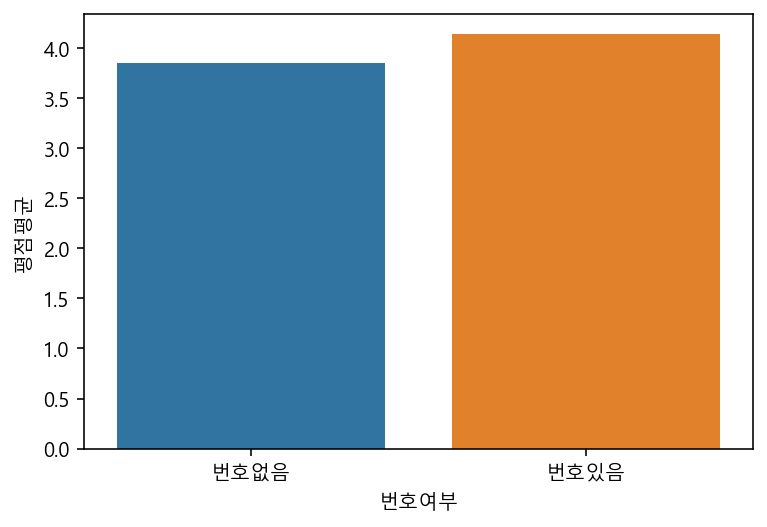

In [99]:
#  Tel과 Rating과의 관계를 살펴본다.
a1 = matzip[['Tel', 'Rating']].groupby('Tel').mean()
a1.reset_index(inplace=True)
a1.columns = ['번호여부', '평점평균']

sns.barplot(data=a1, x='번호여부', y='평점평균')
plt.show()

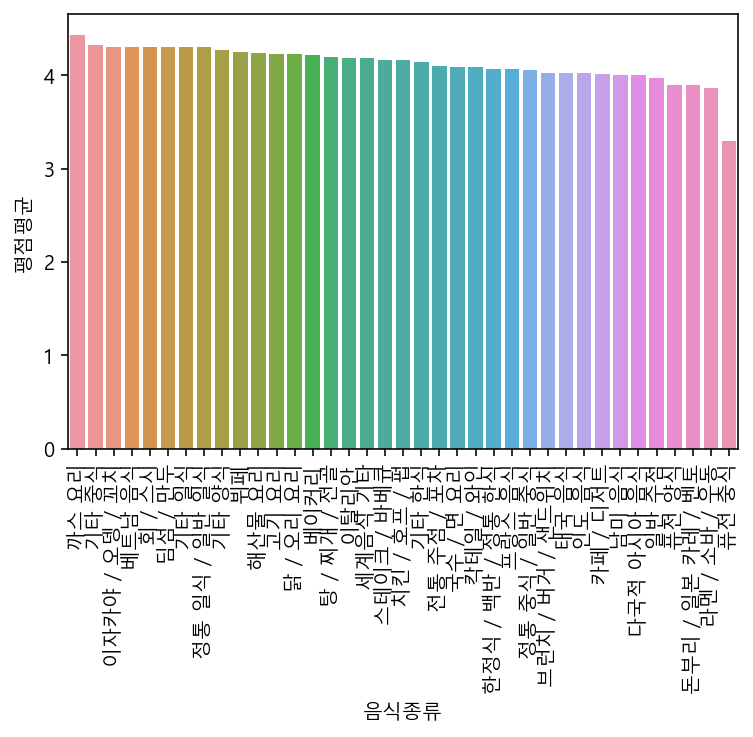

In [102]:
# Food와 Rating간의 관계
a1 = matzip[['Food', 'Rating']].groupby('Food').mean()
a1.reset_index(inplace=True)
a1.columns = ['음식종류', '평점평균']
a1.sort_values(by='평점평균', ascending=False, inplace=True)

sns.barplot(data=a1, x='음식종류', y='평점평균')
plt.xticks(rotation=90)
plt.show()

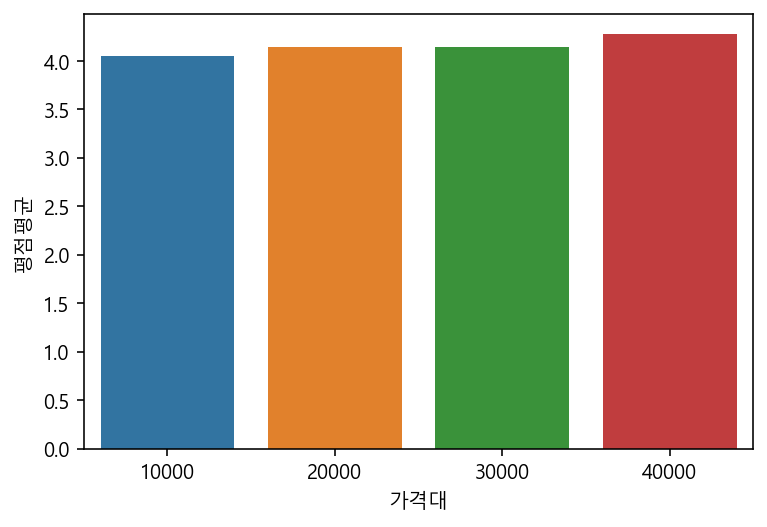

In [103]:
# Rating과 Price와의 관계
a1 = matzip[['Price', 'Rating']].groupby('Price').mean()
a1.reset_index(inplace=True)
a1.columns = ['가격대', '평점평균']
a1.sort_values(by='평점평균', inplace=True, ascending=False)

sns.barplot(data=a1, x='가격대', y='평점평균')
plt.show()

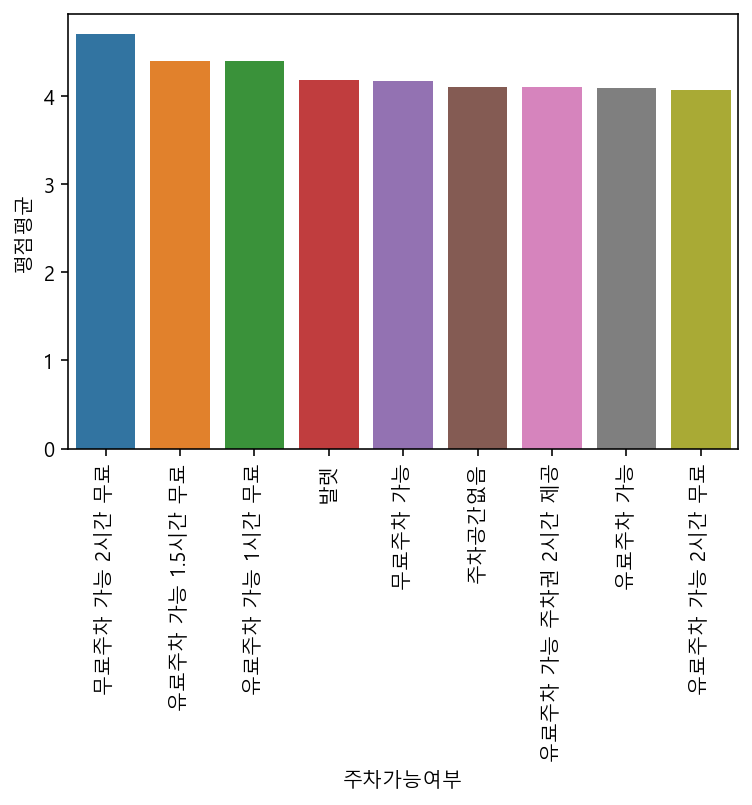

In [112]:
# Parking과 Rating간의 상관관계
a1 = matzip[['Parking', 'Rating']].groupby('Parking').mean()
a1.reset_index(inplace=True)
a1.columns = ['주차가능여부', '평점평균']
a1.sort_values(by='평점평균', inplace=True, ascending=False)

sns.barplot(data=a1, x='주차가능여부', y='평점평균')
plt.xticks(rotation=90)
plt.show()

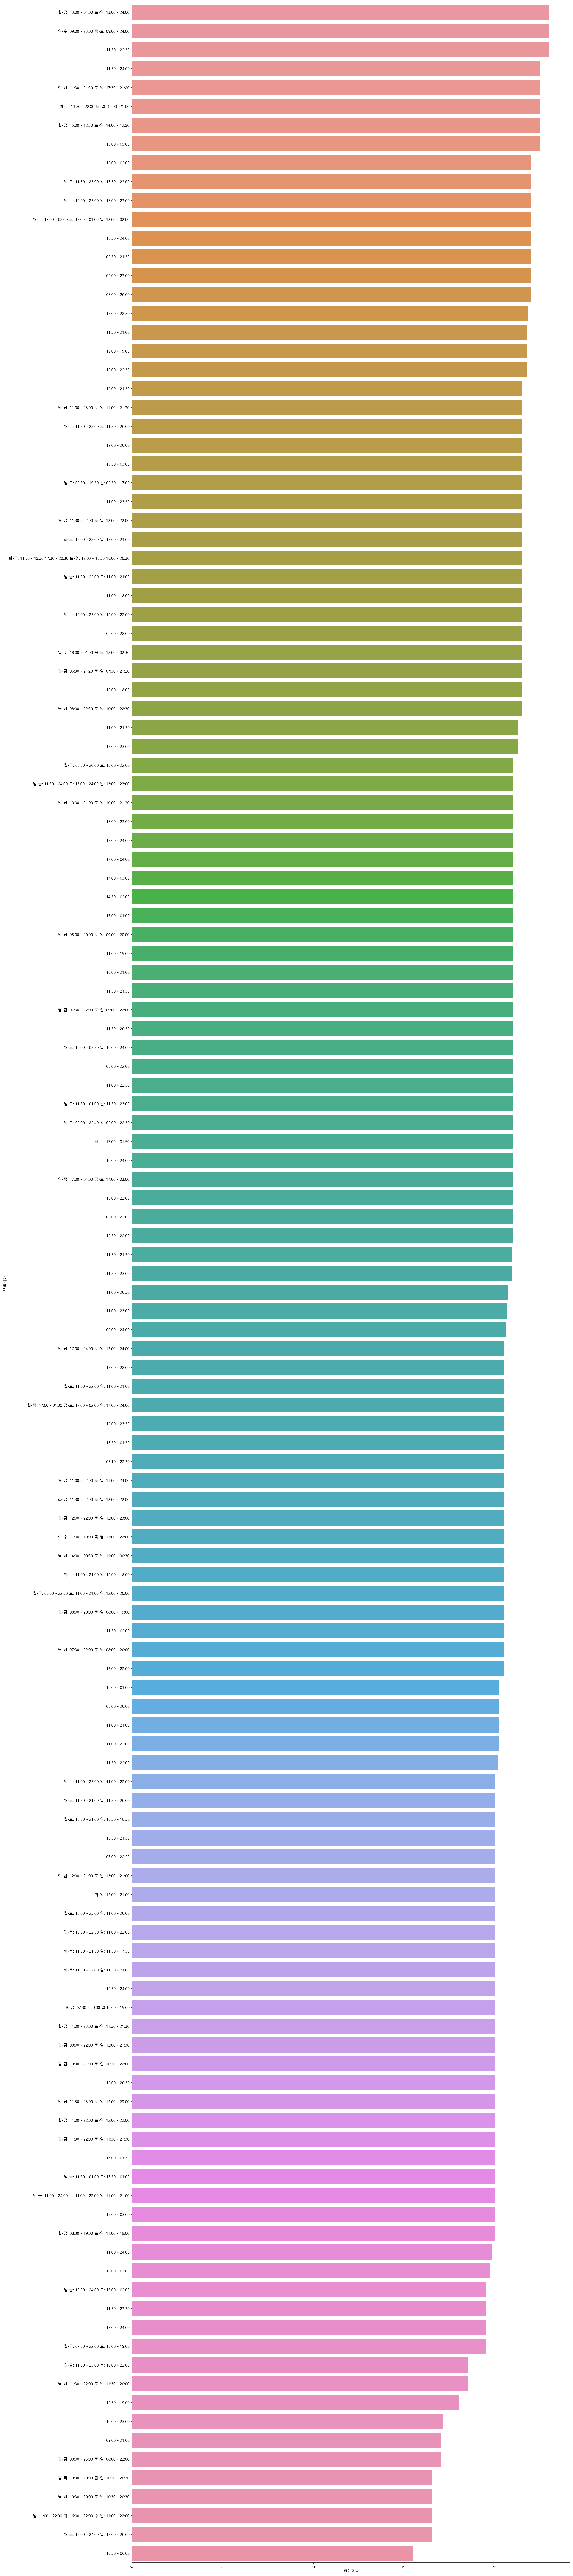

In [117]:
# Operation Time과 Rating간의 관계
a1 = matzip[['Operating Time', 'Rating']].groupby('Operating Time').mean()
a1.reset_index(inplace=True)
a1.columns = ['영업시간', '평점평균']
a1.sort_values(by='평점평균', inplace=True, ascending=False)
plt.figure(figsize=(20,120))
sns.barplot(data=a1, x='평점평균', y='영업시간')
plt.xticks(rotation=90)
plt.show()

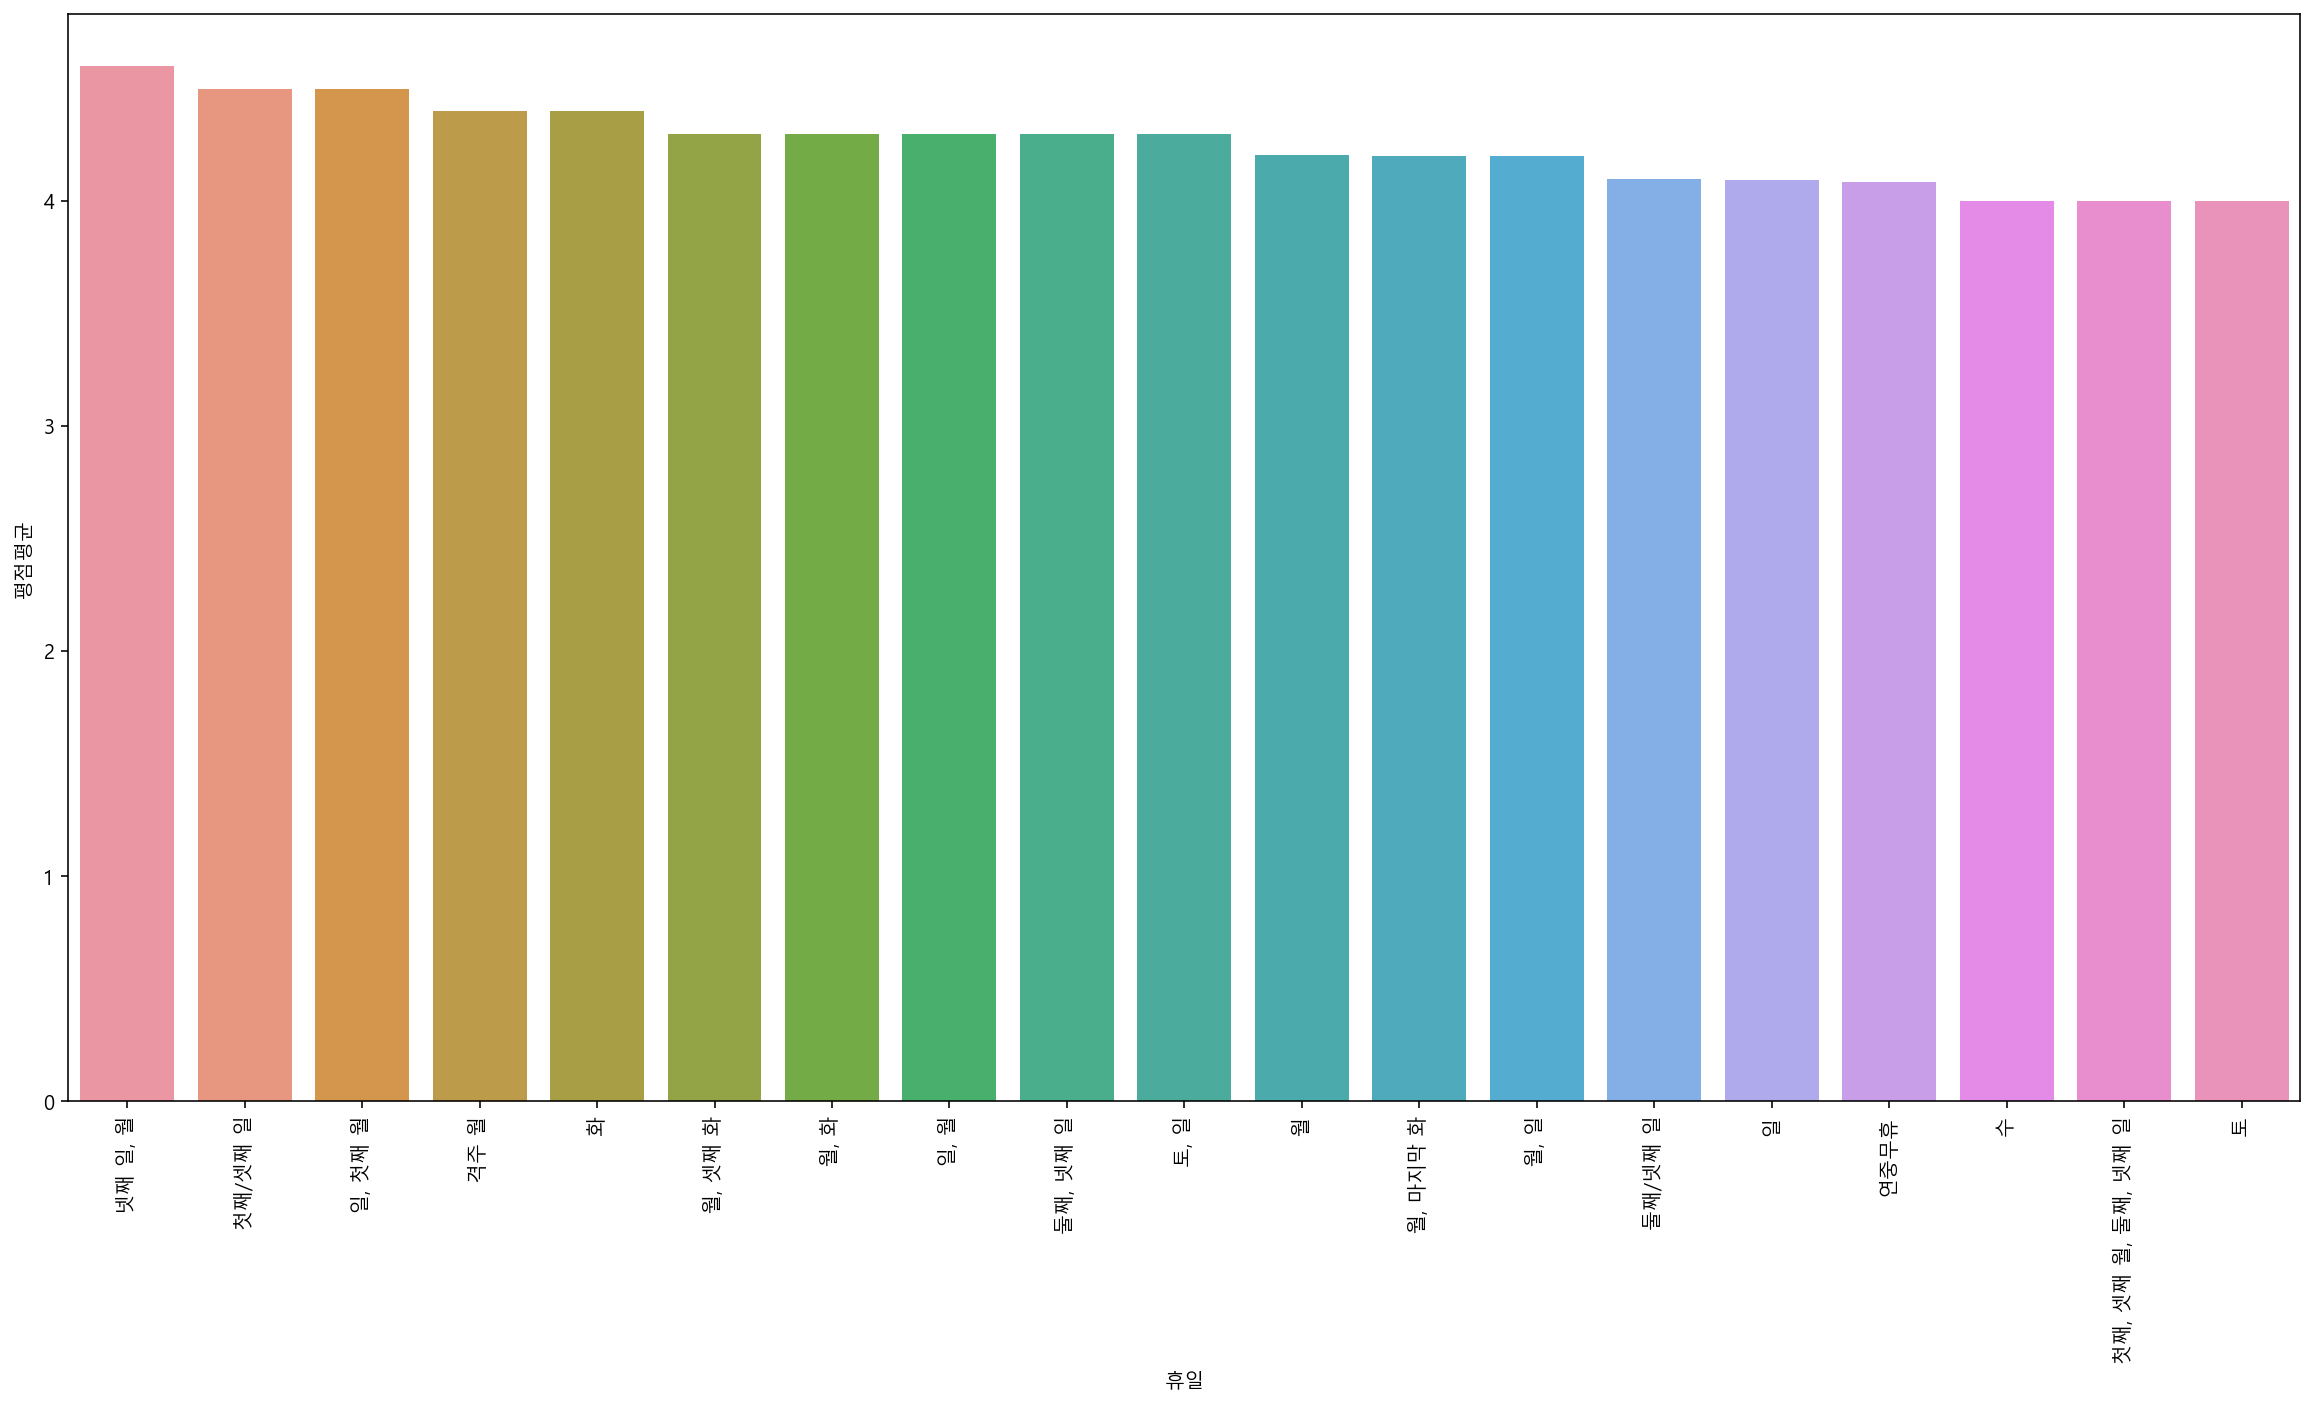

In [124]:
# Holidya와 Rating간의 상관관계
a1 = matzip[['Holiday', 'Rating']].groupby('Holiday').mean()
a1.reset_index(inplace=True)
a1.columns = ['휴일', '평점평균']
a1.sort_values(by='평점평균', inplace=True, ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(data=a1, x='휴일', y='평점평균')
plt.xticks(rotation=90)
plt.show()

In [125]:
# Heatmap을 그리기 위해 필요한 데이터만 추출한다.
a1 = matzip.drop(['Restaurant Name', 'Address'], axis=1)
a1.columns

Index(['Rating', 'Tel', 'Food', 'Price', 'Parking', 'Operating Time',
       'Holiday'],
      dtype='object')

In [128]:
# 각 컬럼의 데이터를 숫자로 변환한다.
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()

a1['Tel'] = encoder1.fit_transform(a1['Tel'])
a1['Food'] = encoder2.fit_transform(a1['Food'])
a1['Parking'] = encoder3.fit_transform(a1['Parking'])
a1['Operating Time'] = encoder4.fit_transform(a1['Operating Time'])
a1['Holiday'] = encoder5.fit_transform(a1['Holiday'])

a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 399
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          245 non-null    float64
 1   Tel             245 non-null    int32  
 2   Food            245 non-null    int32  
 3   Price           245 non-null    int64  
 4   Parking         245 non-null    int32  
 5   Operating Time  245 non-null    int32  
 6   Holiday         245 non-null    int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 18.6 KB


In [129]:
# 상관계수를 구한다.
a2 = a1.corr()
a2

,Rating,Tel,Food,Price,Parking,Operating Time,Holiday
Rating,1.000000,0.254390,-0.154150,0.224497,-0.056132,-0.011862,0.073575
Tel,0.254390,1.000000,-0.061651,0.150205,-0.166386,0.069220,0.073965
Food,-0.154150,-0.061651,1.000000,-0.072829,-0.027036,0.111299,-0.018977
Price,0.224497,0.150205,-0.072829,1.000000,-0.281378,0.019607,-0.024477
Parking,-0.056132,-0.166386,-0.027036,-0.281378,1.000000,-0.022069,0.016185
Operating Time,-0.011862,0.069220,0.111299,0.019607,-0.022069,1.000000,-0.084866
Holiday,0.073575,0.073965,-0.018977,-0.024477,0.016185,-0.084866,1.000000


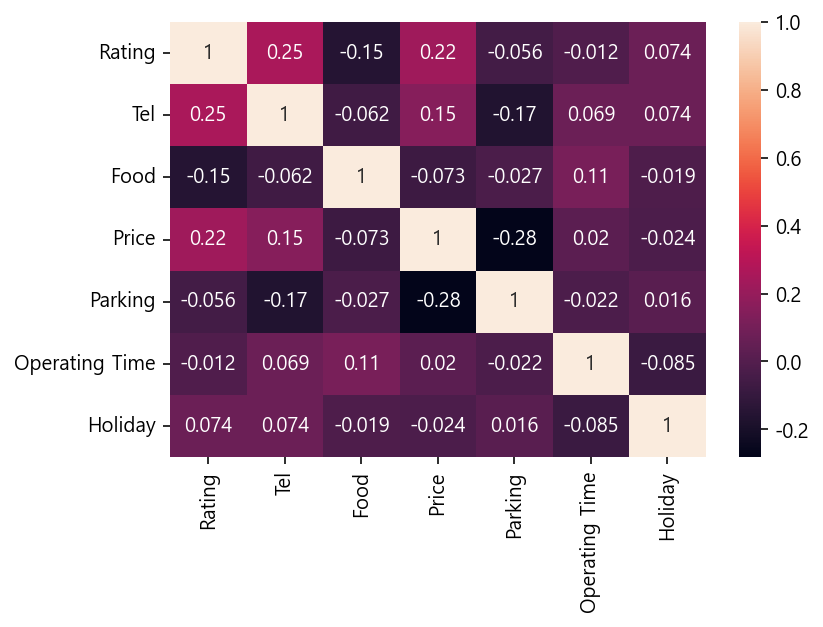

In [130]:
sns.heatmap(a2,annot=True)
plt.show()